<a href="https://colab.research.google.com/github/Prethumnan/Social-network-ads/blob/main/Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Social_Network_Ads.csv

**Step 1 | Data Pre-Processing**

**Importing the Libraries**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.metrics import roc_auc_score

**Importing the dataset**

In [3]:
data=pd.read_csv("Social_Network_Ads.csv")

In [4]:
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [5]:
data["Gender"]=data["Gender"].replace({"Male":1,"Female":0})
data.drop("User ID",axis=1,inplace=True)

In [6]:
data

,Gender,Age,EstimatedSalary,Purchased
0,1,19,19000,0
1,1,35,20000,0
2,0,26,43000,0
3,0,27,57000,0
4,1,19,76000,0
...,...,...,...,...
395,0,46,41000,1
396,1,51,23000,1
397,0,50,20000,1
398,1,36,33000,0


**Splitting the dataset into the Training set and Test set**

In [7]:
x=data.drop(["Purchased","Gender"],axis=1)
y=data["Purchased"]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

**Feature Scaling**

In [8]:
scaler=MinMaxScaler()
scaler.fit(x_train)
for i in ["Age","EstimatedSalary"]:
  x_train[[i]]=scaler.fit_transform(x_train[[i]])
scaler.fit(x_test)
for i in ["Age","EstimatedSalary"]:
  x_test[[i]]=scaler.fit_transform(x_test[[i]])

**Step 2 | Logistic Regression Model**

The library for this job which is going to be the linear model library and it is called linear because the logistic regression is a linear classifier which means that here since we're in two dimensions, our two categories of users are going to be separated by a straight line. Then import the logistic regression class. Next we will create a new object from this class which is going to be our classifier that we are going to fit on our training set.

**Fitting Logistic Regression to the Training set**

In [9]:
model=LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

In [10]:
model.score(x_train,y_train)

0.840625

**Step 3 | Predection**

In [11]:
y_pred=model.predict(x_test)
roc_auc_score(y_test,y_pred)

0.8322851153039832

**Step 4 | Evaluating The Predection**

We predicted the test results and now we will evaluate if our logistic regression model learned and understood correctly. So this confusion matrix is going to contain the correct predictions that our model made on the set as well as the incorrect predictions.

**Making the Confusion Matrix**

In [12]:
confusion_matrix(y_test,y_pred)

array([[47,  6],
       [ 6, 21]])

**Visualization**

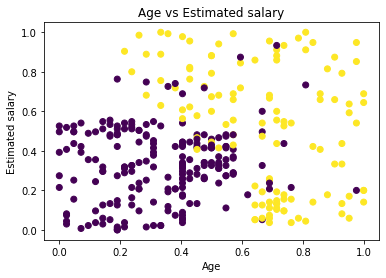

In [26]:
#visualization of training data
plt.xlabel("Age")
plt.ylabel("Estimated salary")
plt.title("Age vs Estimated salary")
plt.scatter(x_train["Age"],x_train["EstimatedSalary"],c=y_train)

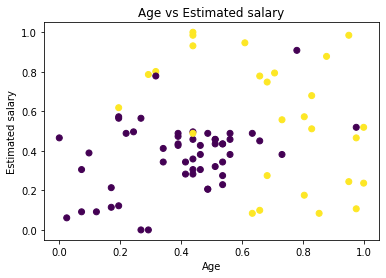

In [31]:
#visualization of testing data(Actual)
plt.xlabel("Age")
plt.ylabel("Estimated salary")
plt.title("Age vs Estimated salary")
plt.scatter(x_test["Age"],x_test["EstimatedSalary"],c=y_test)

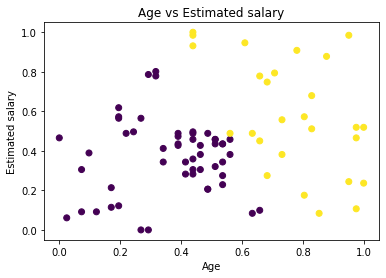

In [32]:
#visualization of testing data(Predicted)
plt.xlabel("Age")
plt.ylabel("Estimated salary")
plt.title("Age vs Estimated salary")
plt.scatter(x_test["Age"],x_test["EstimatedSalary"],c=y_pred)